<a href="https://colab.research.google.com/github/hws2002/Deep_Learning_with_Keras/blob/main/Chapter4/Chapter4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 로드

In [1]:
from tensorflow.keras.datasets import imdb

In [20]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(
    num_words = 10000 # 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미
)

In [6]:
#이 리뷰 데이터 하나를 원래 영어 단어로 바꾸어 보자
from tensorflow import keras
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3

# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in train_data[0])

In [7]:
decoded_sequence

"[START] this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert [OOV] is an amazing actor and now the same being director [OOV] father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for [OOV] and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also [OOV] to the two little boy's that played the [OOV] of norman and paul they were just brilliant children are often left out of the [OOV] list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

# 데이터 준비

## 멀티 핫 인코딩

In [21]:
import numpy as np

def vectorize_sequences(sequences, dimension = 100000):
  results = np.zeros( (len(sequences), dimension) )
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i][j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [37]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# 신경망 모델 만들기

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid"),
])

In [35]:
model.compile(
    optimizer = keras.optimizers.RMSprop(),
    loss = "binary_crossentropy",
    metrics = [keras.metrics.accuracy()]
)

AttributeError: module 'keras.api._v2.keras.metrics' has no attribute 'accuracy'

# 훈련 검증

1만개의 샘플을 떼어 내어 검증 세트를 만들자

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 모델을 훈련시킨다.(훈련데이터에 있는 모든 샘플에 대해 20번 반복)  


In [8]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 37s 1s/step - loss: 0.5451 - binary_accuracy: 0.7859 - val_loss: 0.4417 - val_binary_accuracy: 0.8519
Epoch 2/20
30/30 [==============================] - 11s 359ms/step - loss: 0.3562 - binary_accuracy: 0.8915 - val_loss: 0.3358 - val_binary_accuracy: 0.8822
Epoch 3/20
30/30 [==============================] - 10s 349ms/step - loss: 0.2667 - binary_accuracy: 0.9155 - val_loss: 0.2948 - val_binary_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 11s 366ms/step - loss: 0.2149 - binary_accuracy: 0.9302 - val_loss: 0.3091 - val_binary_accuracy: 0.8740
Epoch 5/20
30/30 [==============================] - 11s 363ms/step - loss: 0.1813 - binary_accuracy: 0.9419 - val_loss: 0.2895 - val_binary_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 11s 379ms/step - loss: 0.1547 - binary_accuracy: 0.9503 - val_loss: 0.2773 - val_binary_accuracy: 0.8874
Epoch 7/20
30/30 [==============================] - 10s 355ms

In [10]:
history_dict = history.history

In [11]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

### 훈련과 검증 손실 그리기

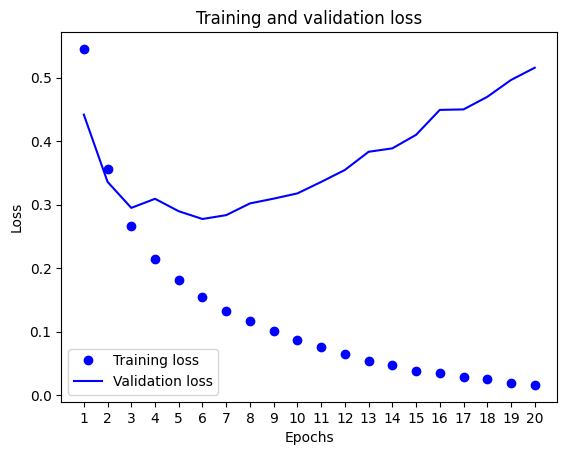

In [16]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = 'Training loss')
plt.plot(epochs,val_loss_values, 'b', label = 'Validation loss')
plt.xticks(epochs)
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

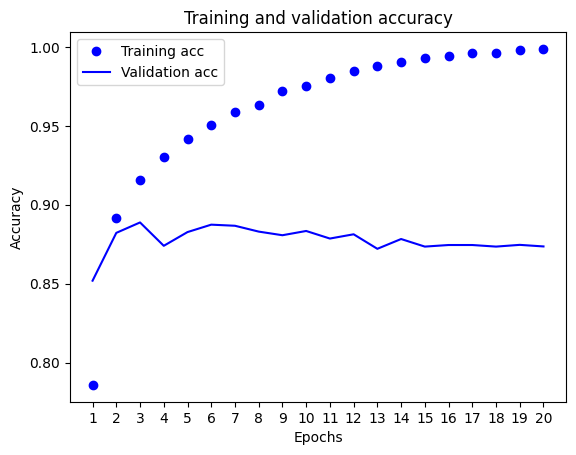

In [17]:
plt.clf()

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.xticks(epochs)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 해석
훈련 손실이 에포크마다 감소하고 훈련 정확도는 에포크마다 증가함.  
경사 하가업 최적화를 사용했을 때 반복마다 최소화되는 것이 손실이므로 기대했던 대로임.  
하지만, 검증 손실과 정확도는 이와 같지 않음.  
4번째 에포크에서 그래프가 역전되는 것 같음.  
이것은 전형적인 과대적합임.  

이런 경우에는 과대적합을 방지하기 위해 네 번째 에포크 이후에 훈련을 중지할 수 있음.  
처음부터 다시 새로운 신경망을 네 번의 에포크 동안만 훈련하고 테스트 데이터에서 평가해보자.

In [38]:
model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid"),
])

In [39]:
model.compile(
    optimizer = "rmsprop",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

In [40]:
model.fit(
  partial_x_train,
  partial_y_train,
  epochs = 4,
  batch_size = 512
)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
30/30 [==============================] - 24s 770ms/step - loss: 0.5625 - accuracy: 0.7716
Epoch 2/4
30/30 [==============================] - 6s 196ms/step - loss: 0.3586 - accuracy: 0.8891
Epoch 3/4
30/30 [==============================] - 6s 196ms/step - loss: 0.2580 - accuracy: 0.9167
Epoch 4/4
782/782 [==============================] - 5s 7ms/step - loss: 0.3010 - accuracy: 0.8770


[0.30103981494903564, 0.8769999742507935]

첫 번째 숫자 0.30103981494903564는 테스트 손실이고, 두 번째 숫자 0.8769999742507935는 테스트 정확도임

# 예측하기

In [41]:
model.predict(x_test)

782/782 [==============================] - 5s 7ms/step


array([[0.25556654],
       [0.99731153],
       [0.81130314],
       ...,
       [0.08292313],
       [0.11034402],
       [0.5307931 ]], dtype=float32)

# Follow-up : 추가실험
1. 여기에서는 최종 분류 층 이전에 2개의 표현 층을 사용했음. 1개 또는 3개의 표현층을 사용하고 검증과 테스트 정확도에 어떤 영향을 미치는지 확인해 보자.  
2. 층의 유닛을 추가하거나 줄여 보자. 32개의 유닛, 64개의 유닛 등
3. binary_crossentropy 대신 mse손실 함수를 사용해 보자
4. relu 대신 tanh 활성화 함수를 사용해 보자.